<a href="https://colab.research.google.com/github/sajidkhan-ai/credit-score-prediction/blob/main/Credit_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Credit Score Prediction**

# Objective: Predict an individual's **creditworthiness** using past financial data.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loaded Data**

In [ ]:
df = pd.read_excel("/content/a_Dataset_CreditScoring.xlsx")

# **Understanding the Data**

In [ ]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [ ]:
df.shape

(3000, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   float64
 15  TLMaxSum         2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,3000.0,0.166667,0.372740,0.0,0.0000,0.00000,0.00000,1.0000
ID,3000.0,62922.683667,37203.691912,66.0,30376.5000,62872.50000,96156.50000,126503.0000
DerogCnt,3000.0,1.430000,2.731469,0.0,0.0000,0.00000,2.00000,51.0000
CollectCnt,3000.0,0.857000,2.161352,0.0,0.0000,0.00000,1.00000,50.0000
BanruptcyInd,3000.0,0.153333,0.360369,0.0,0.0000,0.00000,0.00000,1.0000
InqCnt06,3000.0,3.108333,3.479171,0.0,1.0000,2.00000,4.00000,40.0000
InqTimeLast,2812.0,3.108108,4.637831,0.0,1.0000,1.00000,3.00000,24.0000
InqFinanceCnt24,3000.0,3.555000,4.477536,0.0,1.0000,2.00000,5.00000,48.0000
TLTimeFirst,3000.0,170.113667,92.813700,6.0,106.0000,151.00000,227.00000,933.0000
TLTimeLast,3000.0,11.873667,16.321412,0.0,4.0000,7.00000,13.00000,342.0000


In [ ]:
df = df.drop(columns=['ID'])

In [ ]:
df.groupby('TARGET').mean().T

TARGET,0,1
DerogCnt,1.322400,1.968000
CollectCnt,0.766400,1.310000
BanruptcyInd,0.149200,0.174000
InqCnt06,2.942400,3.938000
InqTimeLast,3.179553,2.764463
InqFinanceCnt24,3.289600,4.882000
TLTimeFirst,173.002000,155.672000
TLTimeLast,11.650000,12.992000
TLCnt03,0.284400,0.228000
TLCnt12,1.832000,1.768000


# **Data Cleaning**

In [ ]:
missing_cols = df.columns[df.isna().any()]
missing_cols

Index(['InqTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt',
       'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct'],
      dtype='object')

In [ ]:
for col in missing_cols:
    df[col + '_missing'] = df[col].isna().astype(int)

In [ ]:
count_cols = [
    'DerogCnt', 'CollectCnt', 'TLBadCnt24', 'TLBadDerogCnt',
    'TLDel60Cnt', 'TLDel60Cnt24', 'TLDel90Cnt24',
    'TLDel3060Cnt24', 'TLDel60CntAll',
    'TL75UtilCnt', 'TL50UtilCnt'
]

df[count_cols] = df[count_cols].fillna(0)

In [ ]:
df['InqTimeLast'] = df['InqTimeLast'].fillna(df['InqTimeLast'].max() + 1)

In [ ]:
ratio_cols = [
    'TLBalHCPct', 'TLSatPct',
    'TLOpenPct', 'TLOpen24Pct'
]

for col in ratio_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
amount_cols = [
    'TLSum', 'TLMaxSum',
    'TLSatCnt', 'TLCnt'
]

for col in amount_cols:
    df[col] = df[col].fillna(df[col].median())

# **Handling Outliers**

In [ ]:
def cap_outliers(df, cols, q=0.99):
    for col in cols:
        upper = df[col].quantile(q)
        df[col] = df[col].clip(upper=upper)
    return df

In [ ]:
df = cap_outliers(df, count_cols + amount_cols)

In [ ]:
df.isna().sum().sort_values(ascending=False).head()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0


# **EDA and Feature Transformation**

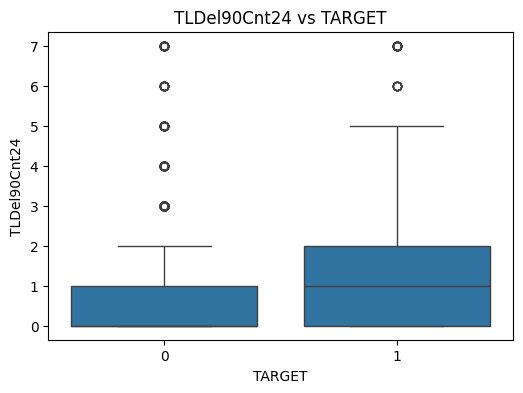

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='TLDel90Cnt24', data=df)
plt.title('TLDel90Cnt24 vs TARGET')
plt.show()

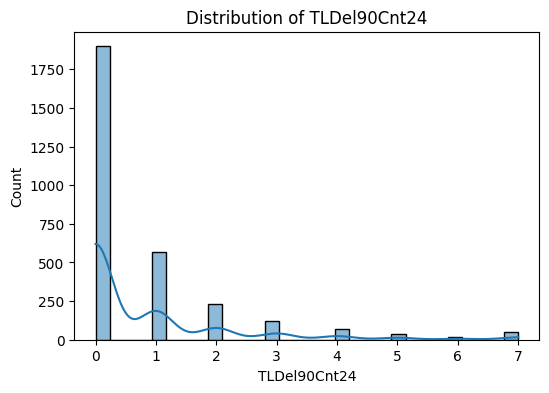

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['TLDel90Cnt24'], bins=30, kde=True)
plt.title('Distribution of TLDel90Cnt24')
plt.show()

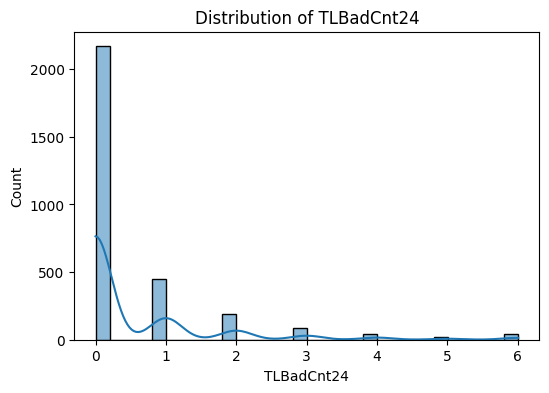

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['TLBadCnt24'], bins=30, kde=True)
plt.title('Distribution of TLBadCnt24')
plt.show()

# **Binning**

In [ ]:
bin_cols = ['DerogCnt','CollectCnt','TLBadCnt24','TLBadDerogCnt','TLDel60Cnt24','TLDel3060Cnt24','TLDel90Cnt24','TLDel60CntAll']

def bin_count_variable(series):
    return pd.cut(
        series,
        bins=[-1, 0, 1, 3, float('inf')],
        labels=['0', '1', '2-3', '4+']
    )

In [ ]:
for col in bin_cols:
    df[col + '_bin'] = bin_count_variable(df[col])

In [ ]:
pd.crosstab(
    df['TLBadDerogCnt_bin'],
    df['TARGET'],
    normalize='index'
)

TARGET,0,1
TLBadDerogCnt_bin,,
0,0.913474,0.086526
1,0.818027,0.181973
2-3,0.751423,0.248577
4+,0.646900,0.353100


# **Selecting Features**

In [ ]:
feature_cols = [
    'DerogCnt_bin',
    'CollectCnt_bin',
    'TLBadCnt24_bin',
    'TLBadDerogCnt_bin',
    'TLDel60Cnt24_bin',
    'TLDel3060Cnt24_bin',
    'TLDel90Cnt24_bin',
    'TLDel60CntAll_bin'
]

# **Encode Bins (One-Hot Encoding)**

In [ ]:
X = pd.get_dummies(
    df[feature_cols],
    drop_first=True
)

y = df['TARGET']

In [ ]:
X

,DerogCnt_bin_1,DerogCnt_bin_2-3,DerogCnt_bin_4+,CollectCnt_bin_1,CollectCnt_bin_2-3,CollectCnt_bin_4+,TLBadCnt24_bin_1,TLBadCnt24_bin_2-3,TLBadCnt24_bin_4+,TLBadDerogCnt_bin_1,...,TLDel60Cnt24_bin_4+,TLDel3060Cnt24_bin_1,TLDel3060Cnt24_bin_2-3,TLDel3060Cnt24_bin_4+,TLDel90Cnt24_bin_1,TLDel90Cnt24_bin_2-3,TLDel90Cnt24_bin_4+,TLDel60CntAll_bin_1,TLDel60CntAll_bin_2-3,TLDel60CntAll_bin_4+
0,False,True,False,False,True,False,True,False,False,False,...,True,False,True,False,False,True,False,False,False,True
1,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,False,False,True,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,False,True,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2997,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2998,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


#**Train–Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# **Train Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs'
)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **Predictions & Probabilities**

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of BAD

# **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


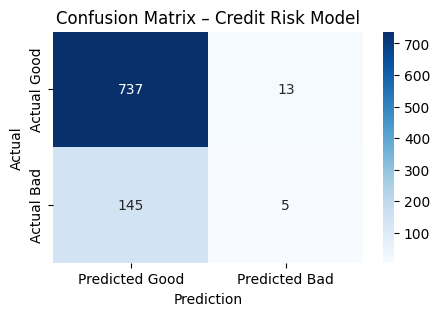

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted Good', 'Predicted Bad'],
    yticklabels=['Actual Good', 'Actual Bad']
)

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Credit Risk Model')
plt.show()

145 bad customers approved is a huge red flag.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       750
           1       0.28      0.03      0.06       150

    accuracy                           0.82       900
   macro avg       0.56      0.51      0.48       900
weighted avg       0.74      0.82      0.76       900



**BAD customers (TARGET = 1):**

Recall = 0.03 (3%)

- catching only 5 out of 150 bad customers

- This is not acceptable in lending.

**Accuracy = 82%**

- But accuracy is lying

**Why?**

- Dataset is imbalanced

- Predicting “everyone is good” already gives ~83%

In [ ]:
profit = 0

for true, pred in zip(y_test, y_pred):
    if pred == 0 and true == 0:
        profit += 100
    elif pred == 0 and true == 1:
        profit -= 500

print("Total Profit:", profit)

Total Profit: 1200


# **Now we will change the Threshold Value**

# **Profit Function**

In [ ]:
def calculate_profit(y_true, y_prob, threshold):
    profit = 0

    for true, prob in zip(y_true, y_prob):
        # Predict BAD if probability >= threshold
        if prob >= threshold:
            # Reject
            continue
        else:
            # Approve
            if true == 0:
                profit += 100   # good approved
            else:
                profit -= 500   # bad approved

    return profit

# **Evaluate Profit Across Thresholds**

In [ ]:
thresholds = np.arange(0.01, 0.51, 0.01)
profits = []

for t in thresholds:
    p = calculate_profit(y_test.values, y_prob, t)
    profits.append(p)

# **Find Best Threshold**

In [ ]:
best_idx = np.argmax(profits)

best_threshold = thresholds[best_idx]
best_profit = profits[best_idx]

print("Best Threshold:", best_threshold)
print("Best Profit:", best_profit)

Best Threshold: 0.12
Best Profit: 31500


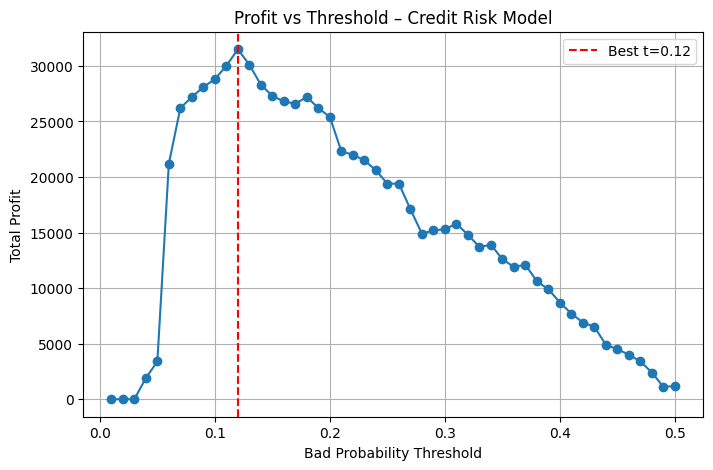

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, profits, marker='o')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best t={best_threshold}')
plt.xlabel('Bad Probability Threshold')
plt.ylabel('Total Profit')
plt.title('Profit vs Threshold – Credit Risk Model')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_opt = (y_prob >= best_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

cm_opt = confusion_matrix(y_test, y_pred_opt)
print(cm_opt)

print(classification_report(y_test, y_pred_opt))

[[435 315]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       750
           1       0.29      0.84      0.43       150

    accuracy                           0.62       900
   macro avg       0.62      0.71      0.57       900
weighted avg       0.84      0.62      0.67       900



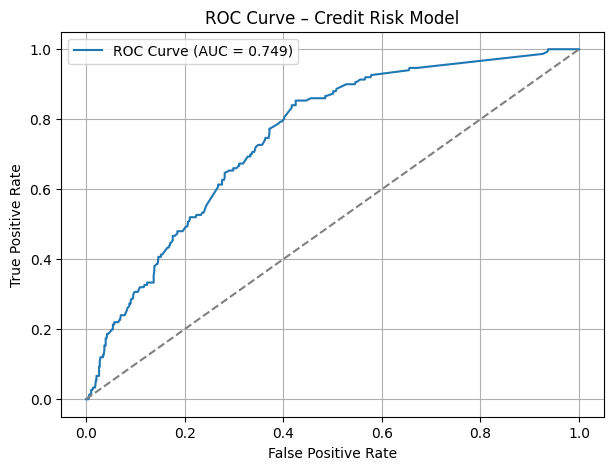

AUC: 0.7487244444444445


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Credit Risk Model')
plt.legend()
plt.grid(True)
plt.show()

print("AUC:", roc_auc)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=50,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=50, n_estimators=300,
                       n_jobs=-1, random_state=42)

# **Predict Probabilities**

In [ ]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
thresholds = np.arange(0.01, 0.51, 0.01)
profits_rf = []

for t in thresholds:
    profits_rf.append(calculate_profit(y_test.values, y_prob_rf, t))

best_idx_rf = np.argmax(profits_rf)
best_threshold_rf = thresholds[best_idx_rf]
best_profit_rf = profits_rf[best_idx_rf]

print("Best RF Threshold:", best_threshold_rf)
print("Best RF Profit:", best_profit_rf)

Best RF Threshold: 0.14
Best RF Profit: 30000


# **Evaluate RF at Best Threshold**

In [ ]:
y_pred_rf = (y_prob_rf >= best_threshold_rf).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[415 335]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.70       750
           1       0.27      0.85      0.42       150

    accuracy                           0.60       900
   macro avg       0.61      0.70      0.56       900
weighted avg       0.84      0.60      0.65       900



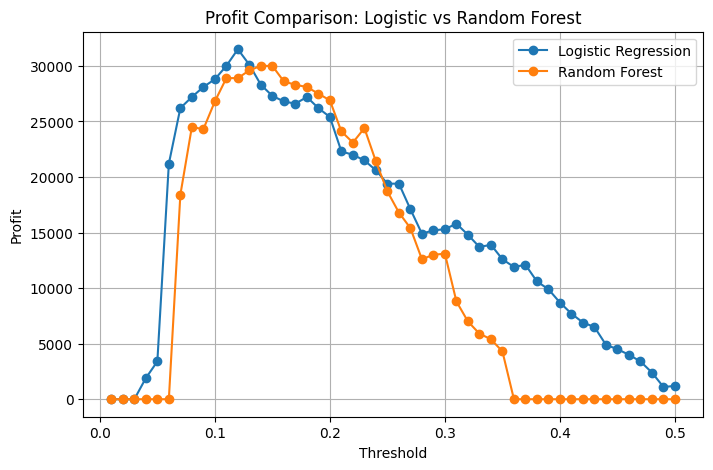

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, profits, label='Logistic Regression', marker='o')
plt.plot(thresholds, profits_rf, label='Random Forest', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit Comparison: Logistic vs Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Random Forest does NOT beat Logistic Regression on profit.

In fact:

- RF earns $1,500 less

- RF rejects more good customers

- RF is harder to explain

- RF provides no material business gain

👉 In a real bank, this would be an easy decision.